In [49]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy 
from scipy.interpolate import interp1d
import math

# Stochastic Degradation Model

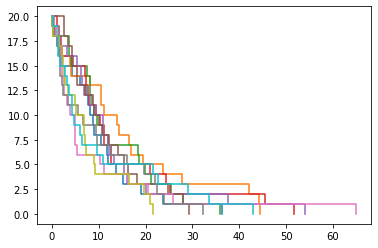

In [106]:
k = 0.1

for i in range(10):
    A = 20
    t = 0
    tao_vals = []
    mol_conc = [A]
    time = [t]
    
    while A > 0:
        r = np.random.uniform(0,1)
        tao = (1/(A*k))*np.log(1/r)
        tao_vals.append(tao)
        t += tao
        time.append(t)
        A = A-1
        mol_conc.append(A)
        
    plt.step(time, mol_conc, where='post') 
    
plt.show()


In [121]:
f1 = interp1d(time, mol_conc, kind = 'previous')

In [102]:
x_new = np.linspace(0,math.floor(max(time)),num=math.floor(max(time))+1)

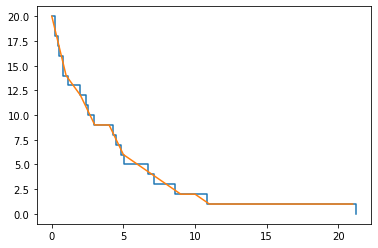

In [105]:
plt.step(time, mol_conc, where='post')
plt.plot(x_new, f1(x_new), '-')
plt.show()

In [109]:
f1(x_new)

array([20., 14., 12.,  9.,  9.,  6.,  5.,  4.,  3.,  2.,  2.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [76]:
time

[0,
 0.1996986803279101,
 0.2522707803787877,
 0.41682038458525944,
 0.5179632844084141,
 0.7480299643393336,
 0.7851812671973191,
 1.1547169496549954,
 1.9370806084188108,
 2.37620748268798,
 2.5215431230663192,
 2.9371973684584813,
 4.269445779831648,
 4.482885472976252,
 4.848794875464168,
 5.01264086221713,
 6.703711312246048,
 7.161381975606392,
 8.600201986398055,
 10.841909921883971,
 21.24688500818157]

In [104]:
mol_conc

[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [108]:
x_new

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21.])

In [112]:
times = np.arange(0,100)

In [134]:
np.concatenate((f1(times[np.where(times<=max(time))]), np.zeros(len(times[np.where(times>max(time))]))))

100